# Capstone Project two: EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Before processing the data has following features

In [4]:
RUL_raw = pd.read_csv("../DataWrangling/Battery_RUL.csv").drop(["Cycle_Index"], axis=1)

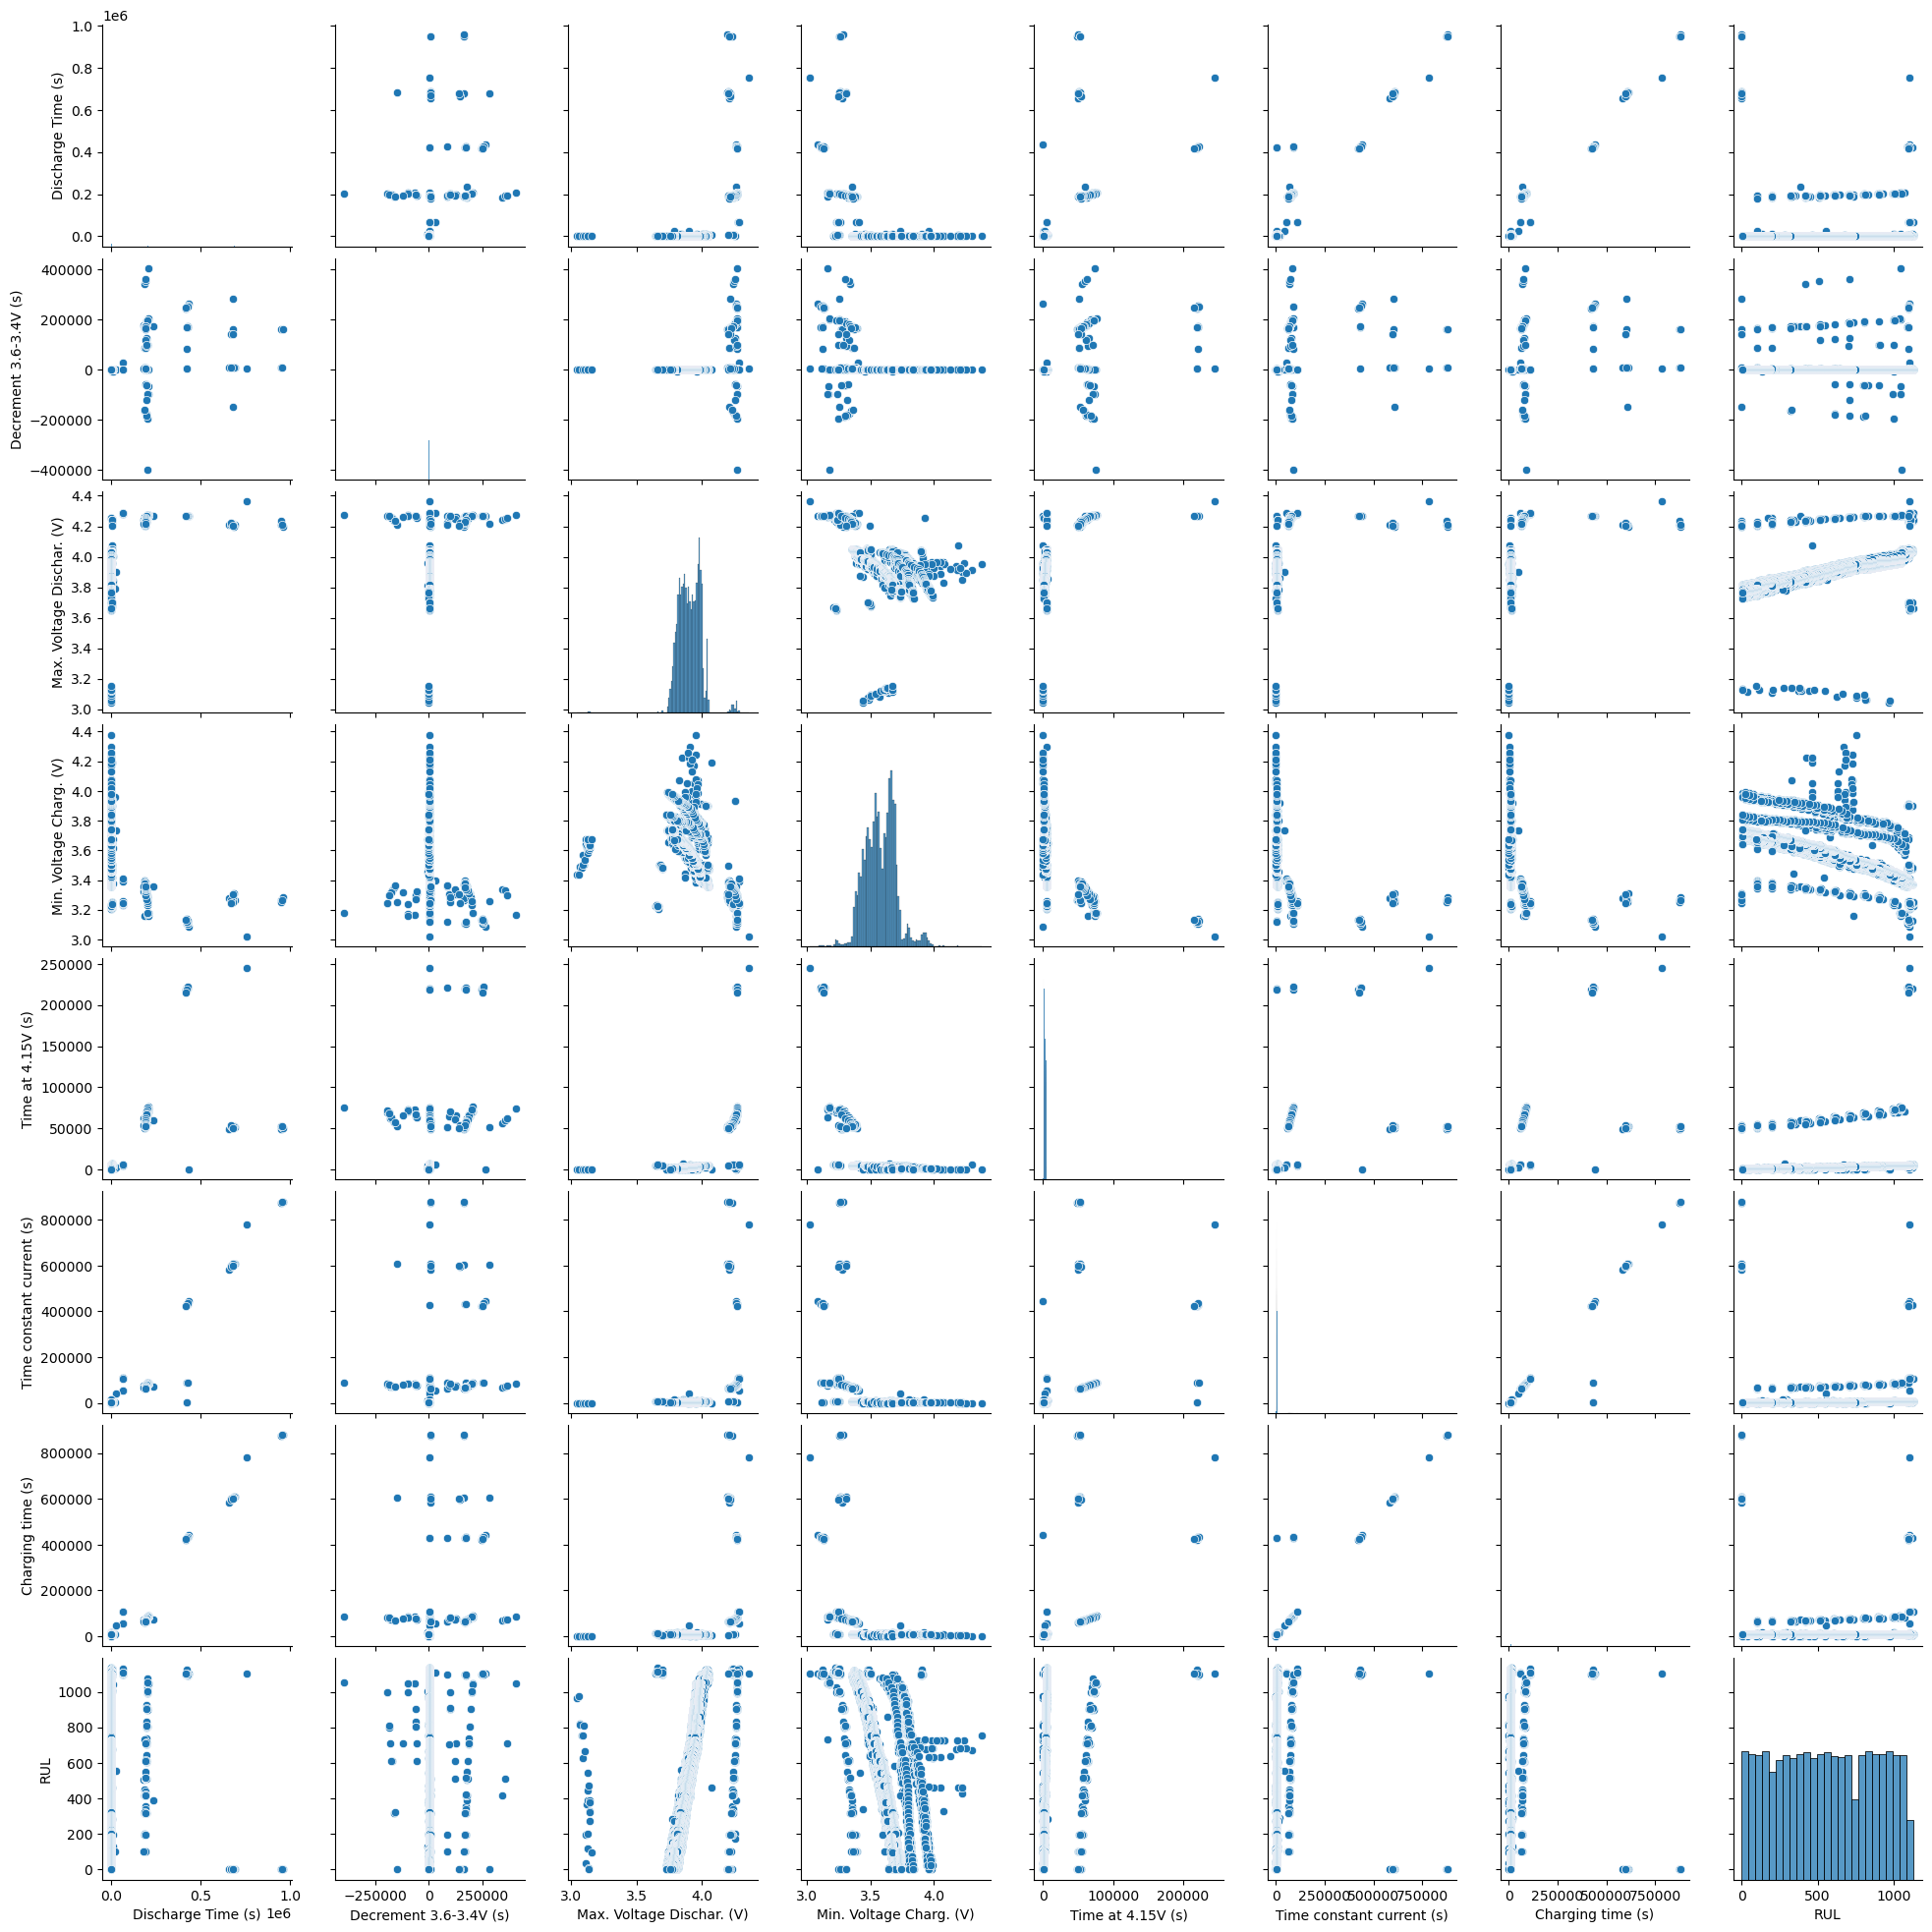

In [5]:
sns.pairplot(RUL_raw)

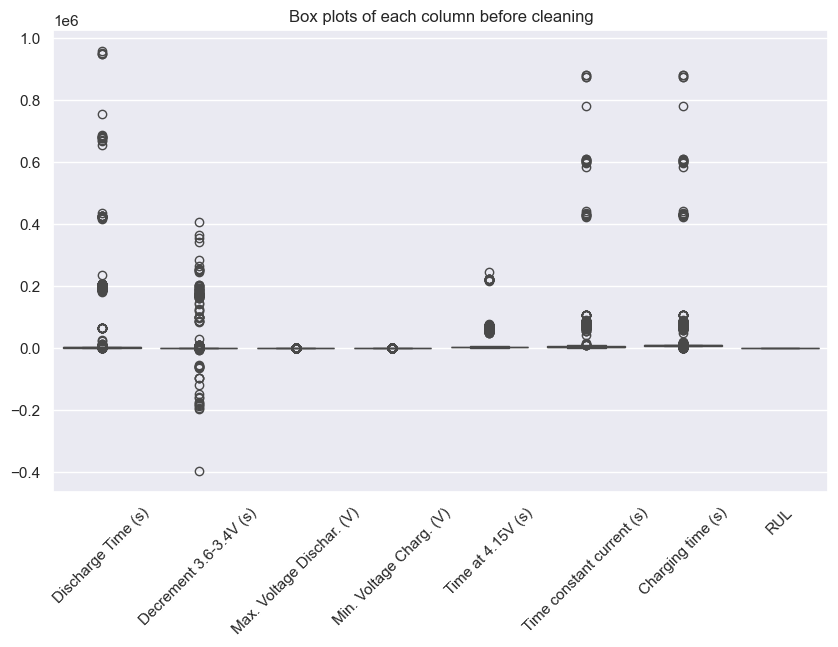

In [6]:
sns.set()
plt.figure(figsize=(10, 6))
sns.boxplot(data=RUL_raw)
plt.title('Box plots of each column before cleaning')
plt.xticks(rotation=45)
plt.show()

<Axes: >

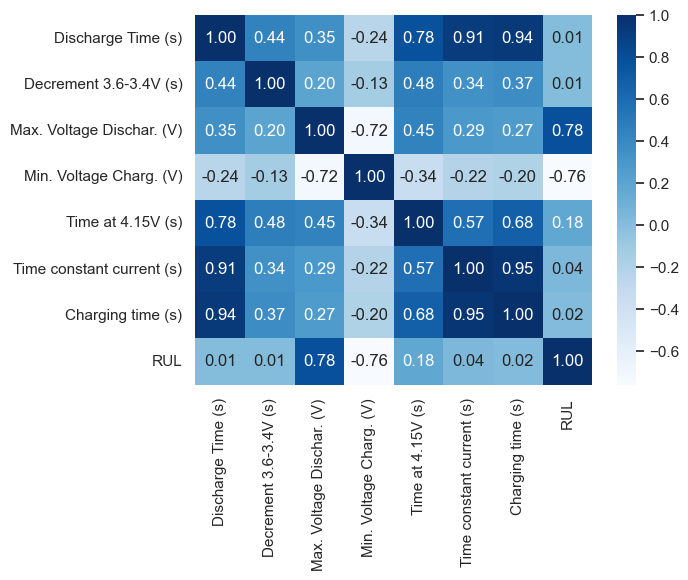

In [7]:
sns.heatmap(RUL_raw.corr(),annot=True, cmap='Blues', fmt='.2f')

In [8]:
RUL_cleaned = pd.read_csv("RUL_cleaned.csv").drop(["Cycle_Index"], axis=1)

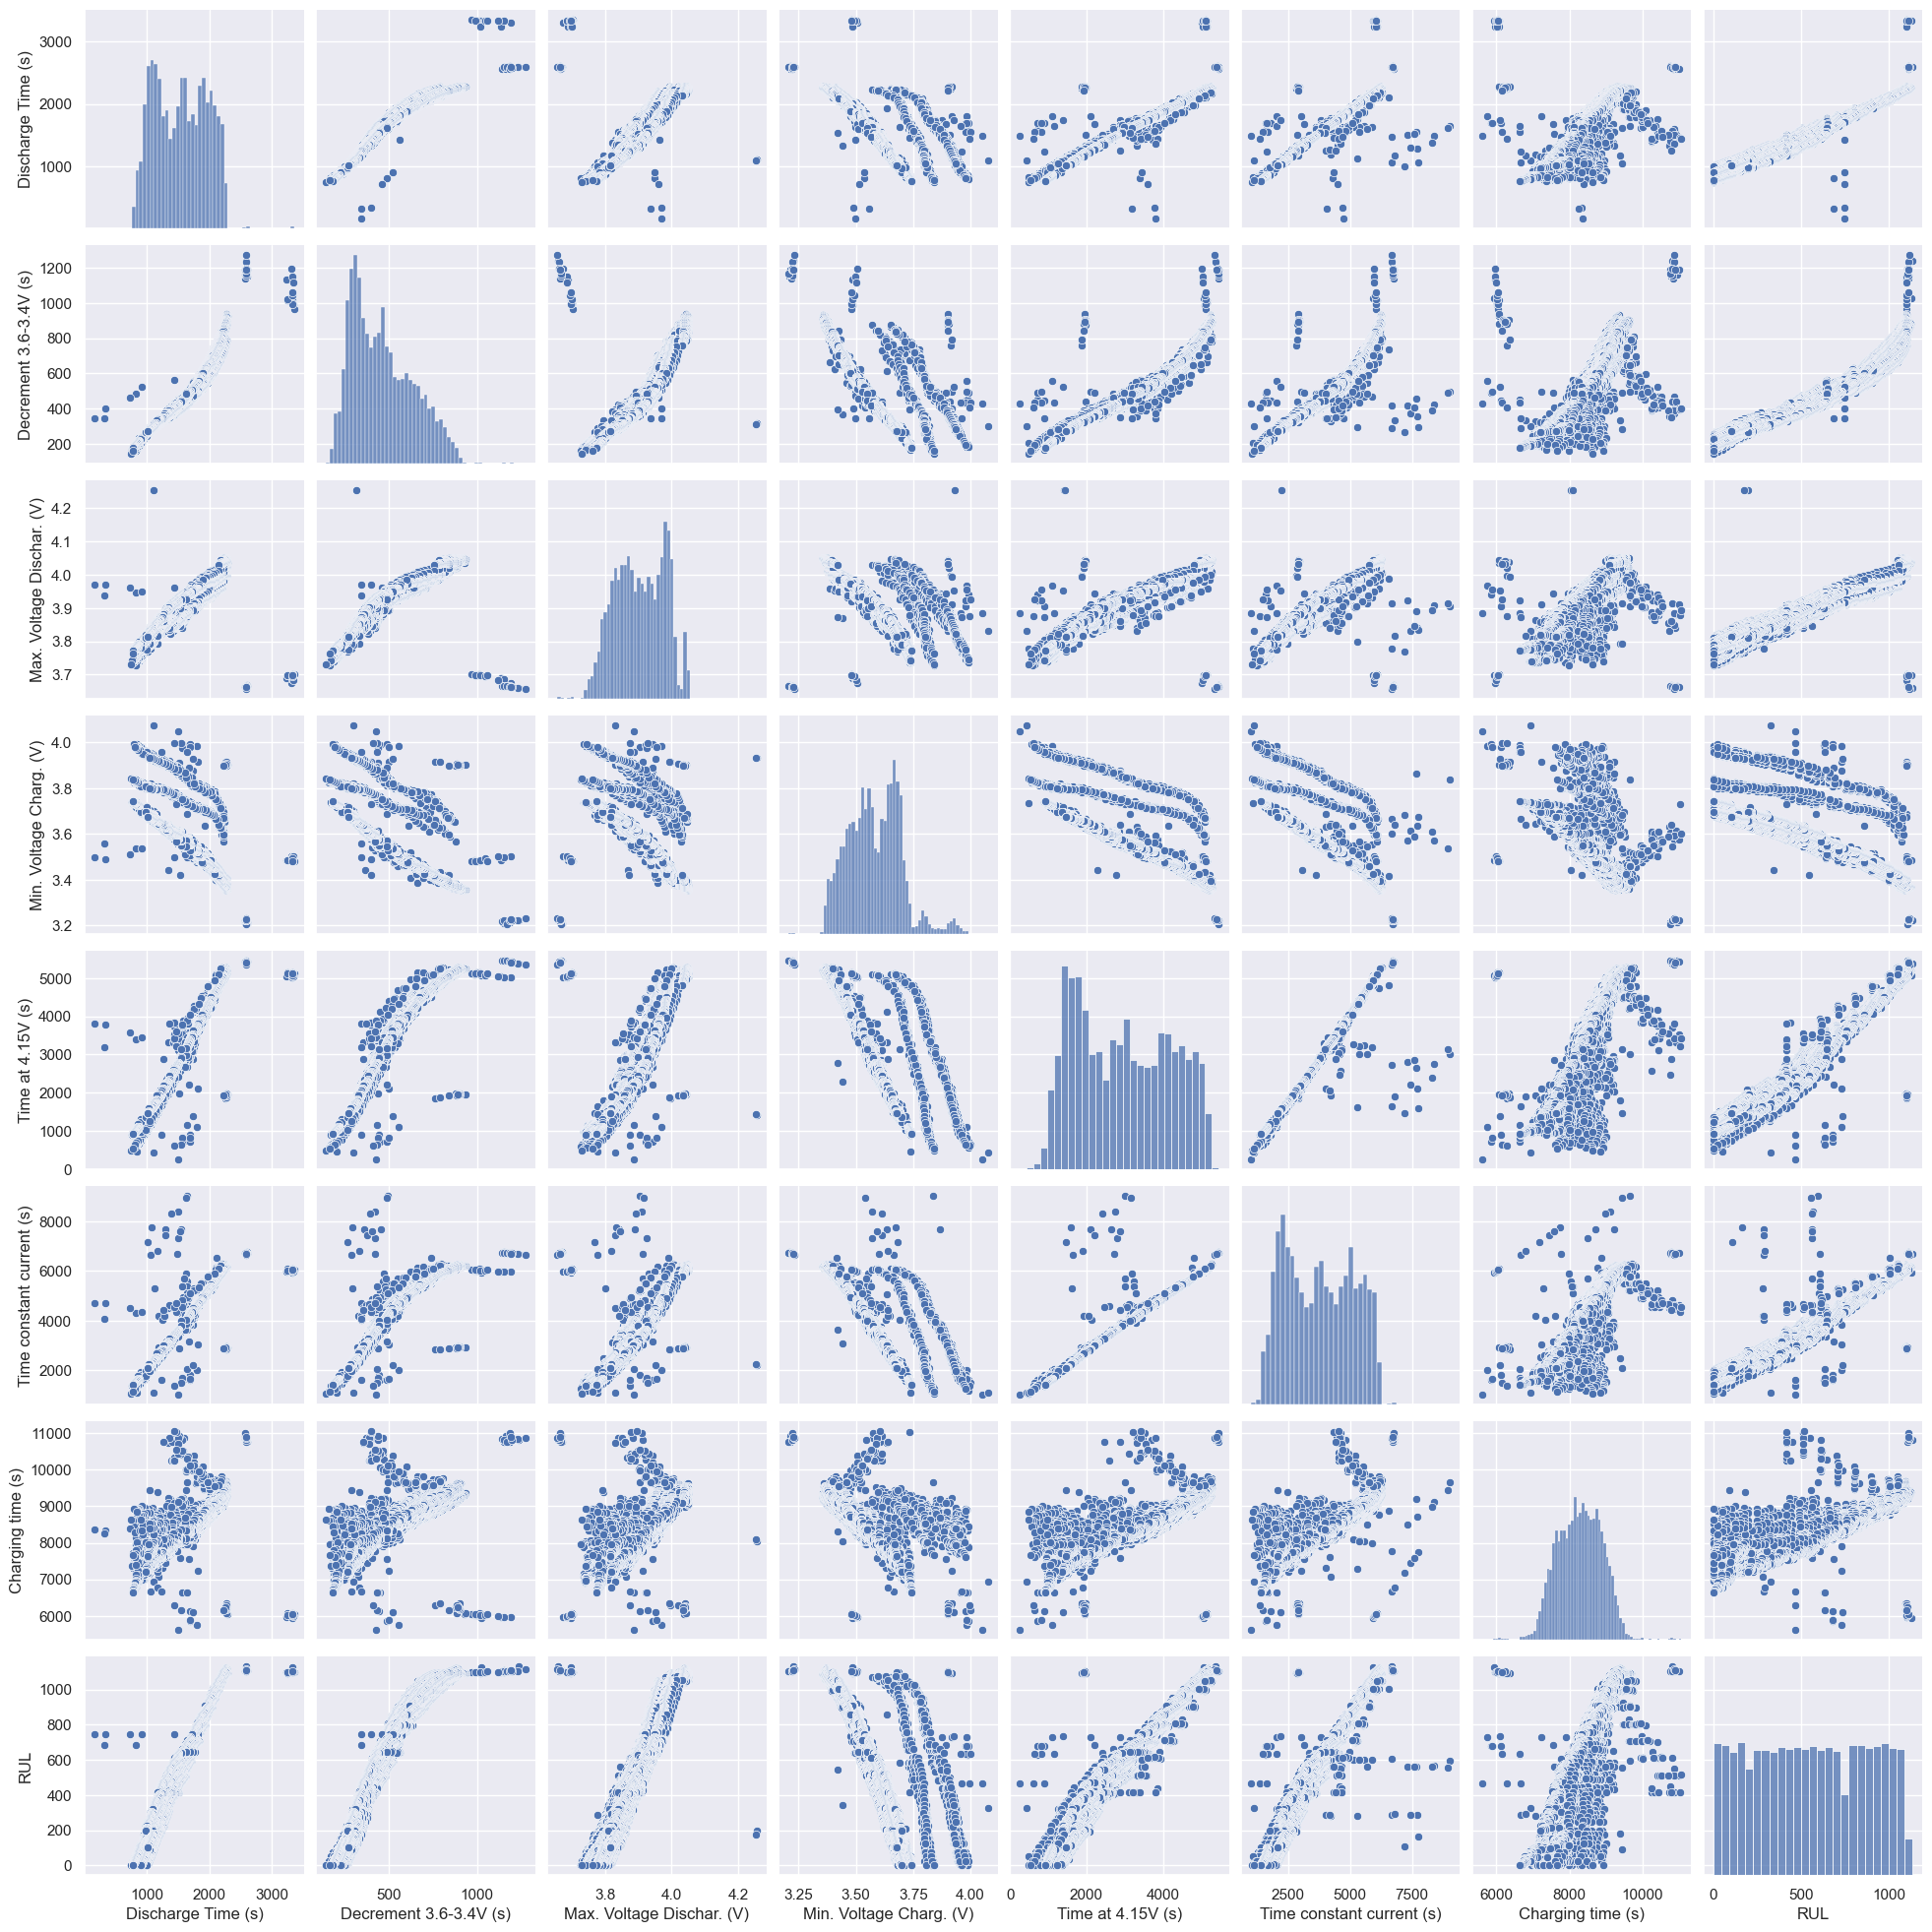

In [9]:
sns.pairplot(RUL_cleaned)

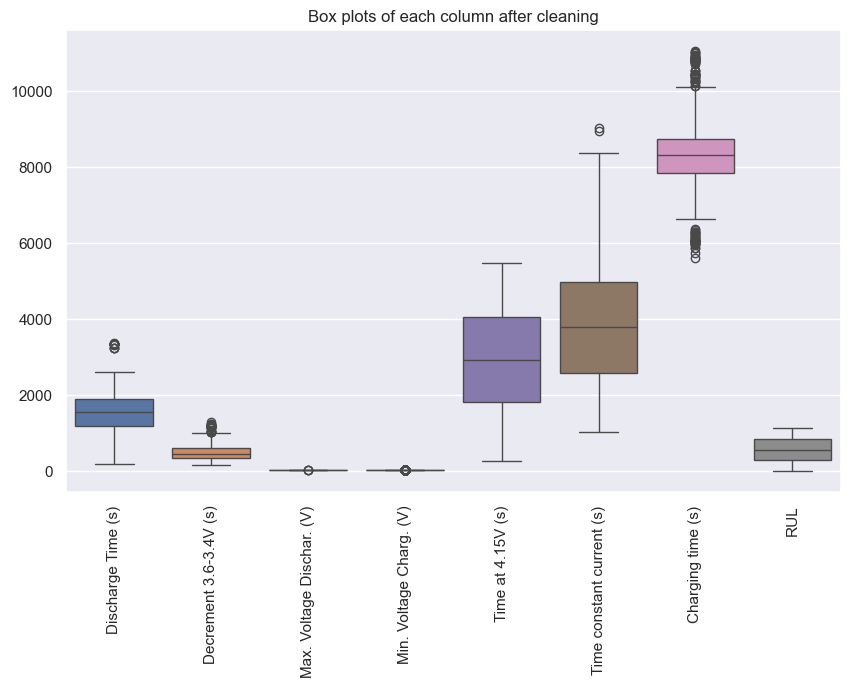

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=RUL_cleaned)
plt.title('Box plots of each column after cleaning')
plt.xticks(rotation=90)
plt.show()

<Axes: >

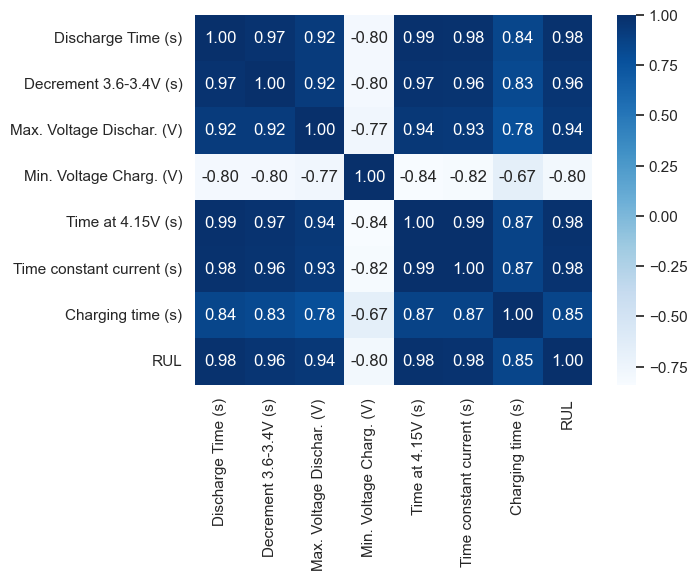

In [11]:
sns.heatmap(RUL_cleaned.corr(),annot=True, cmap='Blues', fmt='.2f')

In [12]:
RUL_cleaned.corr()

Discharge Time (s)  Decrement 3.6-3.4V (s)  \
Discharge Time (s)                   1.000000                0.973372   
Decrement 3.6-3.4V (s)               0.973372                1.000000   
Max. Voltage Dischar. (V)            0.920197                0.917591   
Min. Voltage Charg. (V)             -0.800307               -0.802524   
Time at 4.15V (s)                    0.986610                0.972461   
Time constant current (s)            0.982937                0.964246   
Charging time (s)                    0.842938                0.827391   
RUL                                  0.983252                0.961147   

                           Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  \
Discharge Time (s)                          0.920197                -0.800307   
Decrement 3.6-3.4V (s)                      0.917591                -0.802524   
Max. Voltage Dischar. (V)                   1.000000                -0.771185   
Min. Voltage Charg. (V)                    -0.771185                 1.000000   
Time at 4.15V (s)                           0.935375                -0.839192   
Time constant current (s)                   0.930493                -0.824502   
Charging time (s)                           0.782832                -0.665611   
RUL                                         0.937985                -0.795055   

                           Time at 4.15V (s)  Time constant current (s)  \
Discharge Time (s)                  0.986610                   0.982937   
Decrement 3.6-3.4V (s)              0.972461                   0.964246   
Max. Voltage Dischar. (V)           0.935375                   0.930493   
Min. Voltage Charg. (V)            -0.839192                  -0.824502   
Time at 4.15V (s)                   1.000000                   0.993123   
Time constant current (s)           0.993123                   1.000000   
Charging time (s)                   0.868262                   0.869823   
RUL                                 0.981359                   0.977782   

                           Charging time (s)       RUL  
Discharge Time (s)                  0.842938  0.983252  
Decrement 3.6-3.4V (s)              0.827391  0.961147  
Max. Voltage Dischar. (V)           0.782832  0.937985  
Min. Voltage Charg. (V)            -0.665611 -0.795055  
Time at 4.15V (s)                   0.868262  0.981359  
Time constant current (s)           0.869823  0.977782  
Charging time (s)                   1.000000  0.851406  
RUL                                 0.851406  1.000000

**This suggests that the source of very small correlation among some of the features were the outliers or machine errors.** 

However, downfall of this is that now most of the features seems to be strongly correlating. Let us look at the feature "Time at 4.15V (s)" to visualize it's correlation with other features. 

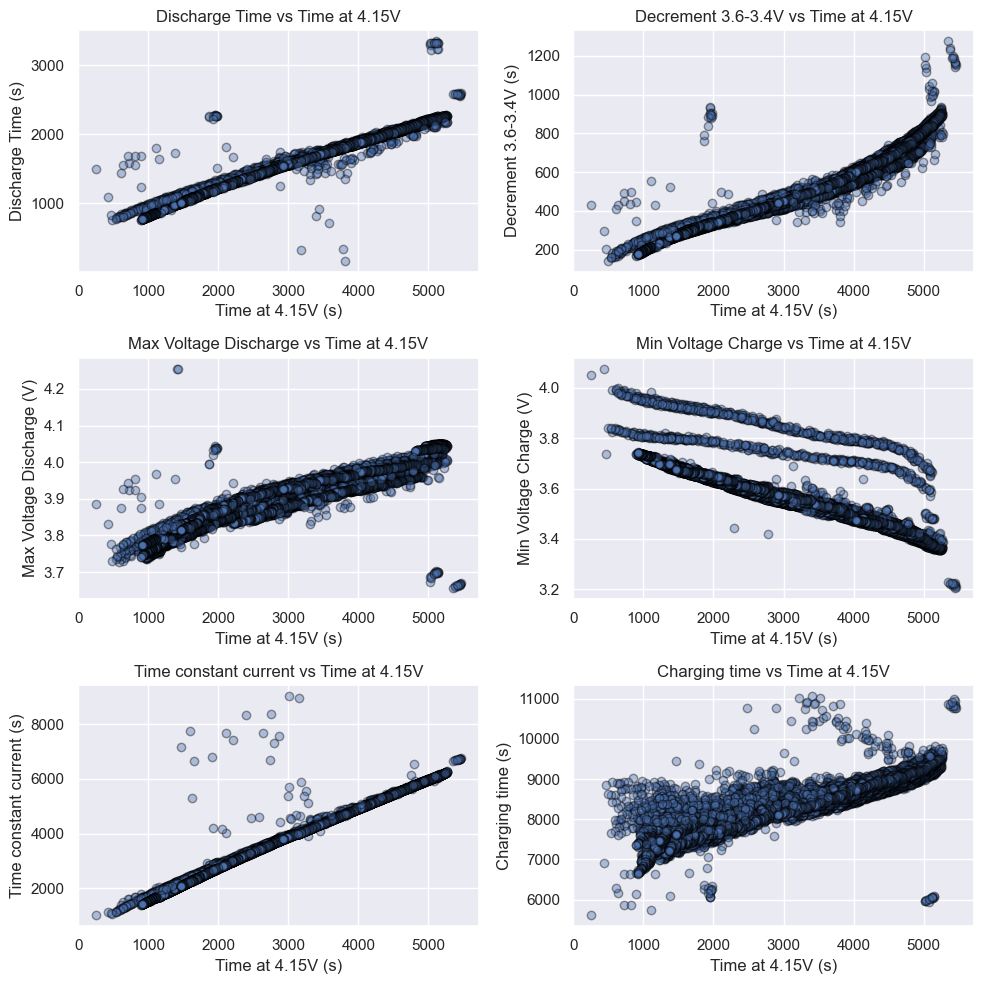

In [70]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Scatter plots with titles and axis labels
axs[0, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Discharge Time (s)"], edgecolors="black", alpha=0.4)
axs[0, 0].set_title("Discharge Time vs Time at 4.15V")
axs[0, 0].set_xlabel("Time at 4.15V (s)")
axs[0, 0].set_ylabel("Discharge Time (s)")

axs[0, 1].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Decrement 3.6-3.4V (s)"], edgecolors="black", alpha=0.4)
axs[0, 1].set_title("Decrement 3.6-3.4V vs Time at 4.15V")
axs[0, 1].set_xlabel("Time at 4.15V (s)")
axs[0, 1].set_ylabel("Decrement 3.6-3.4V (s)")

axs[1, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Max. Voltage Dischar. (V)"], edgecolors="black", alpha=0.4)
axs[1, 0].set_title("Max Voltage Discharge vs Time at 4.15V")
axs[1, 0].set_xlabel("Time at 4.15V (s)")
axs[1, 0].set_ylabel("Max Voltage Discharge (V)")

axs[1, 1].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Min. Voltage Charg. (V)"], edgecolors="black", alpha=0.4)
axs[1, 1].set_title("Min Voltage Charge vs Time at 4.15V")
axs[1, 1].set_xlabel("Time at 4.15V (s)")
axs[1, 1].set_ylabel("Min Voltage Charge (V)")

axs[2, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Time constant current (s)"], edgecolors="black", alpha=0.4)
axs[2, 0].set_title("Time constant current vs Time at 4.15V")
axs[2, 0].set_xlabel("Time at 4.15V (s)")
axs[2, 0].set_ylabel("Time constant current (s)")

axs[2, 1].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Charging time (s)"], edgecolors="black", alpha=0.4)
axs[2, 1].set_title("Charging time vs Time at 4.15V")
axs[2, 1].set_xlabel("Time at 4.15V (s)")
axs[2, 1].set_ylabel("Charging time (s)")

plt.tight_layout()
plt.show()


Above scatterplots clearly indicate that the information carried out by the feature `Time at 4.15V (s)` is also carried by other features and hence this can be droped from the data. Also, let us assign `RUL` as target.

In [22]:
X = RUL_cleaned.drop(["Time at 4.15V (s)","RUL"], axis=1)
y = RUL_cleaned["RUL"]

<Axes: >

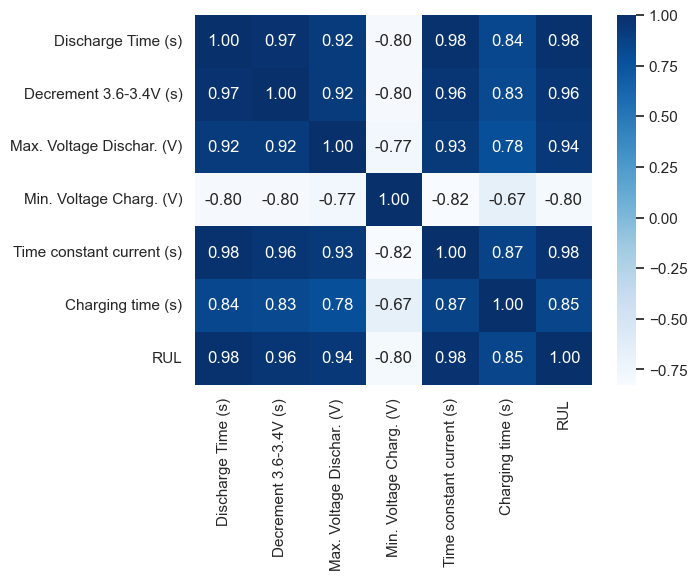

In [26]:
sns.heatmap(RUL_cleaned.drop([ "Time at 4.15V (s)"], axis=1).corr(),annot=True, cmap='Blues', fmt='.2f')

Let us run PCA analysis to check the dimensionality of the data. But, first let us standardize it by using `StandardScaler()`.

In [28]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [30]:
X_scaled.describe()

Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  \
count        1.469600e+04            1.469600e+04               1.469600e+04   
mean         1.160386e-17           -1.547181e-17               4.007198e-15   
std          1.000034e+00            1.000034e+00               1.000034e+00   
min         -3.345824e+00           -1.845644e+00              -3.357810e+00   
25%         -9.098638e-01           -8.423878e-01              -8.046943e-01   
50%          2.090157e-02           -1.671256e-01              -3.450546e-03   
75%          8.683160e-01            7.254019e-01               8.792756e-01   
max          4.416966e+00            4.645389e+00               4.763271e+00   

       Min. Voltage Charg. (V)  Time constant current (s)  Charging time (s)  
count             1.469600e+04               1.469600e+04       1.469600e+04  
mean             -2.773321e-15              -1.315104e-16       8.992988e-16  
std               1.000034e+00               1.000034e+00       1.000034e+00  
min              -3.213458e+00              -2.054655e+00      -4.432043e+00  
25%              -7.601520e-01              -9.079816e-01      -7.444050e-01  
50%              -5.920738e-02              -1.178836e-03       2.096185e-02  
75%               7.015740e-01               8.789214e-01       7.509794e-01  
max               4.214845e+00               3.883079e+00       4.591381e+00

In [32]:
pca = PCA(random_state=123)
pca.fit(X_scaled)

PCA(random_state=123)

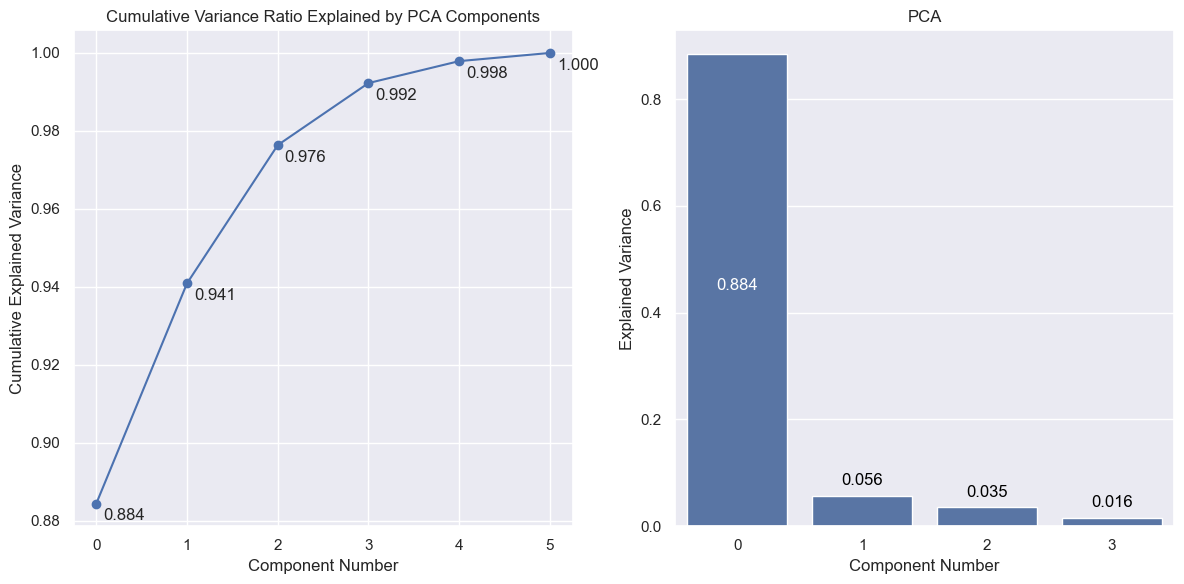

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
ax1.set_xlabel("Component Number")
ax1.set_ylabel("Cumulative Explained Variance")
ax1.set_title("Cumulative Variance Ratio Explained by PCA Components")
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    ax1.annotate(f'{ratio:.3f}', (i, ratio), textcoords="offset points", xytext=(5, -12))

ex_var = pca.explained_variance_ratio_
ax2 = sns.barplot(x=[0, 1, 2, 3], y=ex_var[:4], ax=ax2)
ax2.set_title('PCA')
ax2.set_xlabel('Component Number')
ax2.set_ylabel('Explained Variance')

ax2.text(0, ex_var[0] / 2, round(ex_var[0], 3), color='white', ha='center')
ax2.text(1, ex_var[1] + 0.02, round(ex_var[1], 3), color='black', ha='center')
ax2.text(2, ex_var[2] + 0.02, round(ex_var[2], 3), color='black', ha='center')
ax2.text(3, ex_var[3] + 0.02, round(ex_var[3], 3), color='black', ha='center')

plt.tight_layout()
plt.show()

The data is almost one dimensional. One could consider it to be of 2 dimensional which expalians almost 95% of variance.